In [39]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (12, 12)

In [16]:
file = pd.read_excel('geo.xlsx') 
file = file.sample(3000)

In [17]:
file.columns

Index(['x', 'y', 'comment_class'], dtype='object')

In [18]:
file.comment_class.value_counts()

-1    2612
 1     388
Name: comment_class, dtype: int64

In [19]:
# присваеваем переменным данные из файла, соединяяем их для дальнейшего перевода в вектор 

x = pd.DataFrame(data=file, columns=['x'])
y = pd.DataFrame(data=file, columns=['y'])
df = pd.concat([x,y], axis=1)
X=np.array(df)

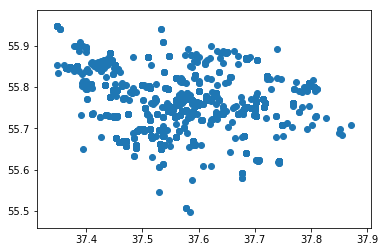

In [20]:
plt.scatter(X[:,0], X[:,1])

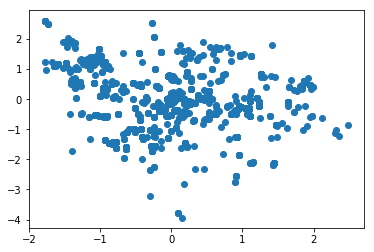

In [21]:
# проведем нормализацию данных
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.scatter(X_scaled[:,0], X_scaled[:,1])


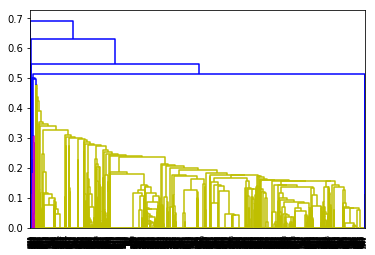

In [22]:
# в качестве тренировки пробовал построить дендрограмму, но данных слишком много поэтому построение либо не происходит, либо очень долго
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_scaled, 'single')
dendrogram(Z)
plt.show()

In [23]:
# Пример одного из типа кластеризации
#from sklearn.cluster import AgglomerativeClustering
#import numpy as np
#X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
#clustering = AgglomerativeClustering(n_clusters=4).fit(X)
#clustering 
#clustering.labels_

# Подбор оптимального кол-ва кластеров.

KMeans минимизирует сумму квадратов расстояний объектов классов до их центроидов. В обученном классификаторе это значение находится в поле inertia_

Посчитаем значения inertia при разном количестве кластеров. Они объективно стремятся к нулю с ростом числа кластеров (предельный случай: каждый объект - кластер, расстояние = 0)

Как подобрать оптимальное значение? Будем на каждом шаге смотреть изменение inertia, и в тот момент, когда оно резко замедлится (относительно предыдущего изменения) мы и остановимся

Для начала считаем сами изменения

$${inertia_{k+1}-inertia_{k}}$$

Оптимальное число кластеров по этой формуле:

$$k_{opt} = argmin(\frac{inertia_{k+1}-inertia_{k}}{inertia_{k}-inertia_{k-1}})$$

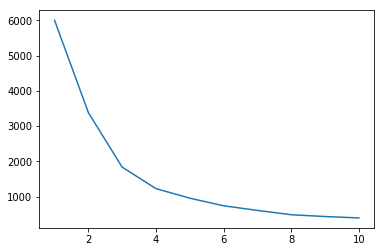

In [24]:
from sklearn.cluster import KMeans

k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia)


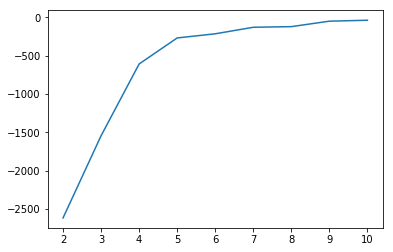

In [25]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

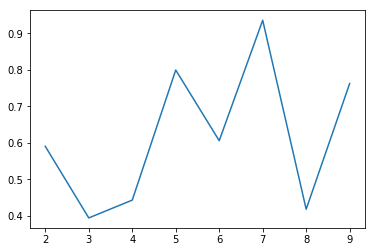

In [26]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)

In [27]:
# при прогонке полных данных предлагалось 8 кластеров
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3

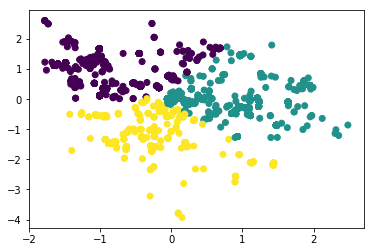

In [28]:
from sklearn.cluster import KMeans

KM=KMeans(n_clusters=3)
y_pred=KM.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_pred )

# Для положительных голосов

In [29]:
# удаляем строки в файле, уоторые содержат элемент "-1", то есть остаются положительные голоса
file_positive_voice=file.query('comment_class !=-1')
x_pos=pd.DataFrame(data=file_positive_voice, columns=['x'])
y_pos=pd.DataFrame(data=file_positive_voice, columns=['y'])

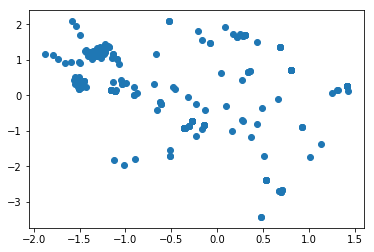

In [30]:
# производим нормализацию и построим график "положительных" голосов
df_pos = pd.concat([x_pos,y_pos], axis=1)
X_pos = np.array(df_pos)

from sklearn.preprocessing import StandardScaler as SS

X_pos_scaled=SS().fit_transform(X_pos)
plt.scatter(X_pos_scaled[:,0], X_pos_scaled[:,1])


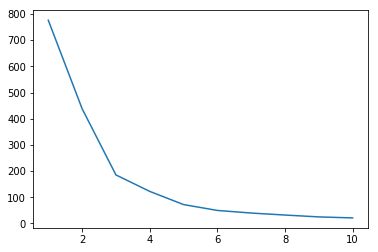

In [31]:
# определение оптимального числа кластеров
from sklearn.cluster import KMeans

k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_pos_scaled, )
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)

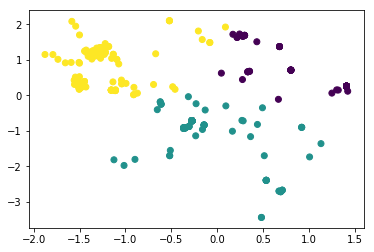

In [32]:
from sklearn.cluster import KMeans

KM=KMeans(n_clusters=3)
ypos_pred=KM.fit_predict(X_pos_scaled)
plt.scatter(X_pos_scaled[:,0], X_pos_scaled[:,1], c=ypos_pred )

# Для негативных голосов

In [33]:
file_negative_voice=file.query('comment_class !=1')

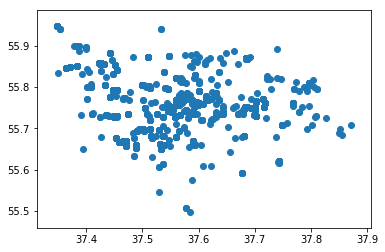

In [34]:
x_neg=pd.DataFrame(data=file_negative_voice, columns=['x'])
y_neg=pd.DataFrame(data=file_negative_voice, columns=['y'])
plt.scatter(x_neg,y_neg)

In [35]:
Xneg=np.array(pd.concat([x_neg,y_neg], axis=1))

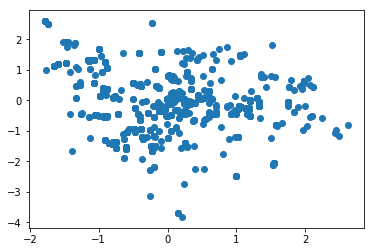

In [36]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
Xneg_scaled=SS.fit_transform(Xneg)
plt.scatter(Xneg_scaled[:,0], Xneg_scaled[:,1])

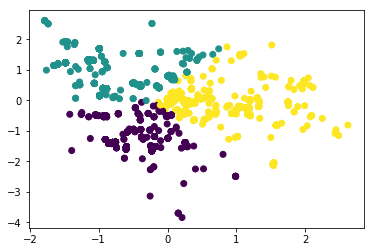

In [37]:
from sklearn.cluster import KMeans
KM=KMeans(n_clusters=3)
yneg_pred=KM.fit_predict(Xneg_scaled)
plt.scatter(Xneg_scaled[:,0], Xneg_scaled[:,1], c=yneg_pred)

In [38]:
from sklearn.metrics import silhouette_score
a=silhouette_score(X_scaled, y_pred)
b=silhouette_score(X_pos_scaled,ypos_pred)
c=silhouette_score(Xneg_scaled,yneg_pred)
print ("a =",a)
print ("b =",b)
print ("c =",c)

a = 0.48536679033896146
b = 0.6552599172182492
c = 0.5288397022938744
